# Team Machine Learning Project: 2020/2021 Tokyo Olympics

In [133]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import style
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


In [159]:
# read data 
medals = pd.read_csv('Medals.csv')
df_1 = pd.read_csv('allvariables.csv')
df_1.head()

,Countries,Number of medals,Number of Athletes,Count of Discipline/Sport,Number of Teams,GDP
0,Venezuela,4,43,10,1,482.40
1,Uzbekistan,3,63,2,1,57.71
2,United States of America,77,615,28,47,20940.00
3,Ukraine,11,152,4,10,155.60
4,Uganda,3,24,2,24,37.37


In [62]:
# describe basic features of data
df_1.describe()

,Number of medals,Number of Athletes,Count of Discipline/Sport,Number of Teams,GDP
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,9.047059,118.317647,5.011765,11.976471,939.944188
std,14.491299,134.120523,6.348030,12.968805,2816.504979
min,1.000000,2.000000,1.000000,1.000000,1.616000
25%,2.000000,35.000000,1.000000,3.000000,55.970000
50%,3.000000,66.000000,2.000000,6.000000,212.500000
75%,8.000000,133.000000,6.000000,16.000000,537.600000
max,77.000000,615.000000,35.000000,48.000000,20940.000000


In [63]:
# Change column names to make them shorter
df_1.columns = 'Countries', 'Medals', 'Athletes', 'Discipline', 'Teams', 'GDP'

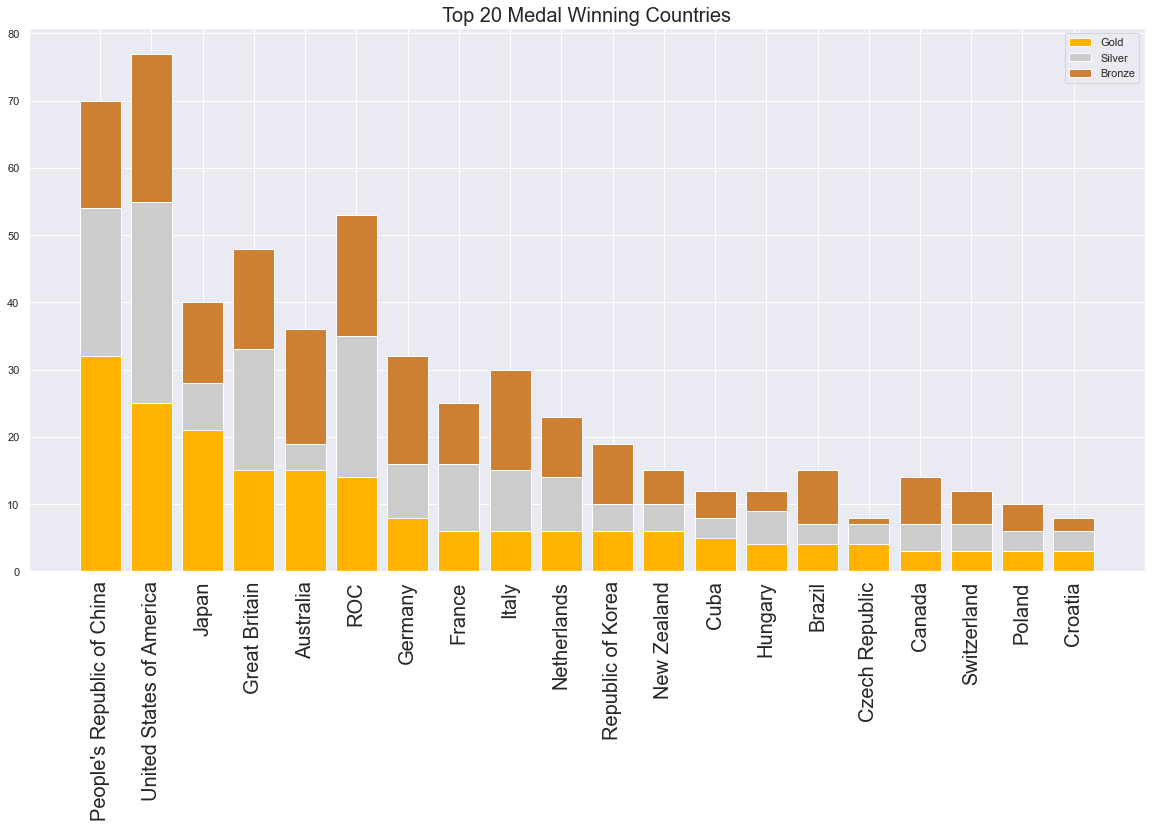

In [163]:
# Medals Visualized
top_20 = medals.head(20)

fig,ax=plt.subplots(figsize = (20,10))

plt.bar(top_20['Team/NOC'],top_20['Gold'],color='#ffb300')
plt.bar(top_20['Team/NOC'],top_20['Silver'], bottom=top_20['Gold'],color='#cccccc')
plt.bar(top_20['Team/NOC'],top_20['Bronze'], bottom=top_20['Gold']+top_20['Silver'],color='#cd7f32')

plt.legend(["Gold","Silver","Bronze"])

length = range(len(top_20))

plt.xticks(length,top_20['Team/NOC'], fontsize=20,rotation=90)
plt.title("Top 20 Medal Winning Countries", fontsize=20)
plt.show()

# A big thanks to kaggle user shikharsinghpatel for inspiring this visualization

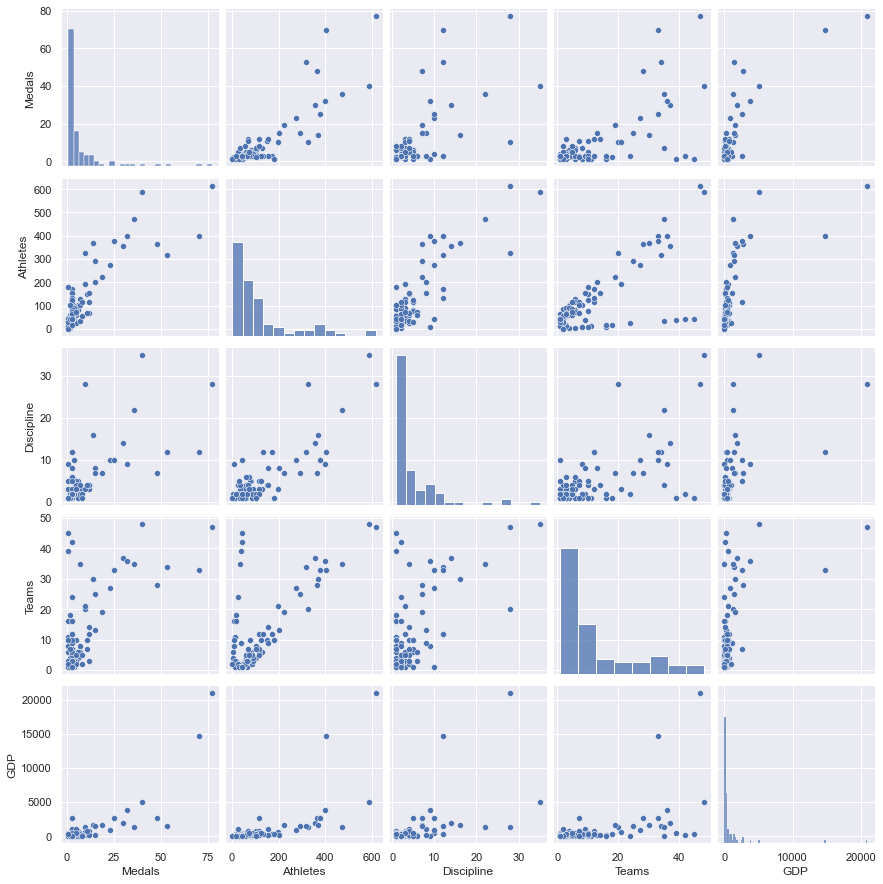

In [64]:
# pairplot of our variables, each observation is a country
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df_1);

In [104]:
# Decision Tree Classifier

# split features matrix and target array
X = df_1.drop(columns = ['Medals', 'Countries'], axis=1) # feature matrix 
y = df_1['Medals'] # target

# splits data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creates sklearn model instance, fits feature and target data
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# evaluates model accuracy
score = accuracy_score(y_test, predictions)
score
# need more data!

0.17647058823529413

In [131]:
# Another model: naive Bayes

# split features matrix and target array
X = df_1.drop(columns = ['Medals', 'Countries'], axis=1) # feature matrix 
y = df_1['Medals'] # target

# splits data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model
model = GaussianNB()                       
model.fit(X_train, y_train)                  
predictions = model.predict(X_test) 

# eval
score = accuracy_score(y_test, predictions)
score

0.23529411764705882

In [158]:
# Simple Linear Regression

# split features matrix and target array
X = df_1.drop(columns = ['Medals', 'Countries'], axis=1) # feature matrix 
y = df_1['Medals'] # target

# model
model = LinearRegression()                       
model.fit(X, y)                  
predictions = model.predict(X) 

# eval, here score calculates the R-squared value, 85.9% of the variation in medal count can be explained with this model 


score = model.score(X, y)
score # aka r^2


0.859343526903836